In [1]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

In [2]:
def compute_probs(data, n=10): 
    data = np.array(data)
    h, e = np.histogram(data, n)
    p = h/data.shape[0]
    return e, p

def support_intersection(p, q): 
    sup_int = (
        list(
            filter(
                lambda x: (x[0]!=0) & (x[1]!=0), zip(p, q)
            )
        )
    )
    return sup_int

def get_probs(list_of_tuples): 
    p = np.array([p[0] for p in list_of_tuples])
    q = np.array([p[1] for p in list_of_tuples])
    return p, q

def kl_divergence(p, q): 
    return np.sum(p*np.log(p/q))


def compute_kl_divergence(train_sample, test_sample, n_bins=10): 
    """
    Computes the KL Divergence using the support 
    intersection between two different samples
    """
    E = 0.0000000001
    e, p = compute_probs(train_sample, n=n_bins)
    _, q = compute_probs(test_sample, n=e)
    
    p = np.array(p) + E 
    q = np.array(q) + E 
    
    p = p/sum(p)
    q = q/sum(q)
    
    list_of_tuples = support_intersection(p, q)
    p, q = get_probs(list_of_tuples)
    
    return kl_divergence(p, q)


In [4]:
import os 

# load distributions coverage

k volte, con n0 e t0 random

In [5]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal



line_width = 1.5


In [6]:
def compute_counts(ro,e):
    counts = []
    e = np.array(e)
    for i in range(len(ro)-1):
        r1 = ro[i]
        r2 = ro[i+1]
        ee = e[e>r1]
        count = ee[ee<=r2]
        counts.append(len(count))
    return counts

def compute_multpile_counts(ranges,ee):
    counts = []
    for e in ee:
        counts.append(compute_counts(ranges,e))
    return counts



# example of calculating the kl divergence between two mass functions
from math import log2

In [7]:

def compute_ks_r0(file_name,nb_bins=50):
    res_etn = []
    res_tag = []
    res_stm = []
    res_dym = []
    res_stab = []
    o_in,stb_in,e_in,s_in,t_in,d_in = load_r0(file_name,["la025","la015","la001"])
    
    
    for k in range(3):
        res_stab.append(compute_kl_divergence(o_in[k],stb_in[k],nb_bins))
        
    for k in range(3):
        tmp = []
        for i in e_in[k]:
            kl = compute_kl_divergence(o_in[k],i,nb_bins)
            tmp.append(kl)
        #res_etn.append([np.mean(tmp),np.std(tmp)])
        res_etn.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])
        
    for k in range(3):
        tmp = []
        for i in s_in[k]:
            kl = compute_kl_divergence(o_in[k],i,nb_bins)
            tmp.append(kl)
        #res_stm.append([np.mean(tmp),np.std(tmp)])
        res_stm.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])

    for k in range(3):
        tmp = []
        for i in d_in[k]:
            kl = compute_kl_divergence(o_in[k],i,nb_bins)
            tmp.append(kl)
        #res_dym.append([np.mean(tmp),np.std(tmp)])
        res_dym.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])


    for k in range(3):
        tmp = []
        for i in t_in[k]:
            kl = compute_kl_divergence(o_in[k],i,nb_bins)
            tmp.append(kl)
        #res_tag.append([np.mean(tmp),np.std(tmp)])
        res_tag.append([np.mean(tmp),np.std(tmp)/np.sqrt(len(tmp))])



    return [res_stab,np.array(res_etn),np.array(res_tag),np.array(res_stm),np.array(res_dym)]

In [8]:
def load_cov(file_name):
    ori_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/orig.npy")
    sta_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/stab.npy")
    etn_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/etn.npy")
    stm_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/stm.npy")
    tag_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/tag.npy")
    dym_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/coverage/dym.npy")
    
    return ori_cov,sta_cov,etn_cov,stm_cov,tag_cov,dym_cov

def load_mfpt(file_name):
    ori_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/orig.npy")
    sta_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/stab.npy")
    etn_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/etn.npy",allow_pickle=True)
    stm_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/stm.npy",allow_pickle=True)
    tag_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/tag.npy",allow_pickle=True)
    dym_cov = np.load("dynamic_results/"+file_name+"/Multiple_run/MFPT/dym.npy",allow_pickle=True)
    
    return ori_cov,sta_cov,etn_cov,stm_cov,tag_cov,dym_cov

def compute_cov_give_file(file_name,nb_bins=50):

    ori_cov,sta_cov,etn_cov,stm_cov,tag_cov,dym_cov = load_cov(file_name)

    ec_kl = []
    tc_kl = []
    sc_kl = []
    dc_kl = []
    for i in etn_cov:
        ec_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in tag_cov:
        tc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in dym_cov:
        dc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in stm_cov:
        sc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))

    stb = compute_kl_divergence(ori_cov,sta_cov,n_bins=nb_bins)

    #res = [[stb],
    #       [np.nanmean(ec_kl),np.nanstd(ec_kl)],[np.nanmean(tc_kl),np.nanstd(tc_kl)],
    #       [np.nanmean(sc_kl),np.nanstd(sc_kl)],[np.nanmean(dc_kl),np.nanstd(dc_kl)]]

    res = [[stb],
           [np.nanmean(ec_kl),np.nanstd(ec_kl)/np.sqrt(len(ec_kl))],[np.nanmean(tc_kl),np.nanstd(tc_kl)/np.sqrt(len(tc_kl))],
           [np.nanmean(sc_kl),np.nanstd(sc_kl)/np.sqrt(len(sc_kl))],[np.nanmean(dc_kl),np.nanstd(dc_kl)/np.sqrt(len(dc_kl))]]
    
    return res

def compute_mfpt_give_file(file_name,nb_bins=50):
    
    ori_cov,sta_cov,etn_cov,stm_cov,tag_cov,dym_cov = load_mfpt(file_name)
    
    ec_kl = []
    tc_kl = []
    sc_kl = []
    dc_kl = []
    for i in etn_cov:
        ec_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in tag_cov:
        tc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in dym_cov:
        dc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))
    for i in stm_cov:
        sc_kl.append(compute_kl_divergence(ori_cov,i,n_bins=nb_bins))

    stb = compute_kl_divergence(ori_cov,sta_cov,n_bins=nb_bins)

    #res = [[stb],
    #       [np.nanmean(ec_kl),np.nanstd(ec_kl)],[np.nanmean(tc_kl),np.nanstd(tc_kl)],
    #       [np.nanmean(sc_kl),np.nanstd(sc_kl)],[np.nanmean(dc_kl),np.nanstd(dc_kl)]]

    res = [[stb],
           [np.nanmean(ec_kl),np.nanstd(ec_kl)/np.sqrt(len(ec_kl))],[np.nanmean(tc_kl),np.nanstd(tc_kl)/np.sqrt(len(tc_kl))],
           [np.nanmean(sc_kl),np.nanstd(sc_kl)/np.sqrt(len(sc_kl))],[np.nanmean(dc_kl),np.nanstd(dc_kl)/np.sqrt(len(dc_kl))]]
    
    return res

In [9]:

def load_r0(file_name,lambds=["la001"]):
    ori = []
    stb = []
    etn = []
    tag = []
    stm = []
    dym = []
    for lambd in lambds:
        ori.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/orig.npy"))
        stb.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/stab.npy"))
        etn.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/etn.npy"))
        tag.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/tag.npy"))
        stm.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/stm.npy"))
        dym.append(np.load("dynamic_results/"+file_name+"/Multiple_run/R0/"+lambd+"/dym.npy"))

    return ori,stb,etn,stm,tag,dym
    
import math




In [10]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D




def plot_cov_mfpt3(ax,file_name,nb_bins=50,legend=False):
    
    if file_name == "LH10":
        #ax.set_title("Hospital")
        ax.set_title("Hospital")
    if file_name == "InVS13":
        ax.set_title("Workplace")
    if file_name == "High_School11":
        ax.set_title("High school")
        
        
    cov = compute_cov_give_file(file_name,nb_bins)
    mfpt = compute_mfpt_give_file(file_name,nb_bins)
    
    x = np.arange(2)
    
    x1 = np.array([cov[0],mfpt[0]])
    x2 = np.array([cov[1],mfpt[1]])
    x3 = np.array([cov[2],mfpt[2]])
    x4 = np.array([cov[3],mfpt[3]])
    x5 = np.array([cov[4],mfpt[4]])
    
    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    width = 0.2
    rects1 = ax.bar(x - 0.3, x2[:,0], width, yerr=x2[:,1], label='ETN-gen',color=ETN_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x - 0.1, x3[:,0], width, yerr=x3[:,1], label='STM',color=STM_COLOR, error_kw=error_bar_style)
    rects5 = ax.bar(x + 0.1, x5[:,0], width, yerr=x5[:,1], label='TagGen',color=TAG_COLOR, error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.3 , x4[:,0], width, yerr=x4[:,1], label='Dymond',color=DYM_COLOR, error_kw=error_bar_style)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    #ax.set_ylim((0,1))

        
def empty_plot(ax):
    
    ax.plot()
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # No ticks
    ax.set_xticks([])
    ax.set_yticks([])
    


In [11]:
def plot_r03(ax,file_name,legend=False):
    
    if file_name == "LH10":
        #ax.set_title("Hospital")
        ax.set_title("Hospital")
    if file_name == "InVS13":
        ax.set_title("Workplace")
    if file_name == "High_School11":
        ax.set_title("High school")
        
    x1,x2,x3,x4,x5 = compute_ks_r0(file_name)
    print(x1)
    x = np.arange(3)
    width = 0.2
    
    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)

    rects1 = ax.bar(x - 0.3, x2[:,0], width, label='ETN-gen',color=ETN_COLOR, yerr=x2[:,1], error_kw=error_bar_style)
    rects4 = ax.bar(x - 0.1, x3[:,0], width, label='STM',color=STM_COLOR, yerr=x3[:,1], error_kw=error_bar_style)
    rects5 = ax.bar(x + 0.1, x5[:,0], width, label='TagGen',color=TAG_COLOR, yerr=x5[:,1], error_kw=error_bar_style)
    rects4 = ax.bar(x + 0.3 , x4[:,0], width, label='Dymond',color=DYM_COLOR, yerr=x4[:,1], error_kw=error_bar_style)
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    #ax.set_ylim((0,1))
    
    if legend:
        c = 0

[3.4969797089014723, 1.8171155070132732, 0.46125780593524945]
[1.0209548369379886, 1.1782996927346763, 0.0042098101761091355]
[4.162126331177575, 1.479635448861891, 0.22126849450359148]


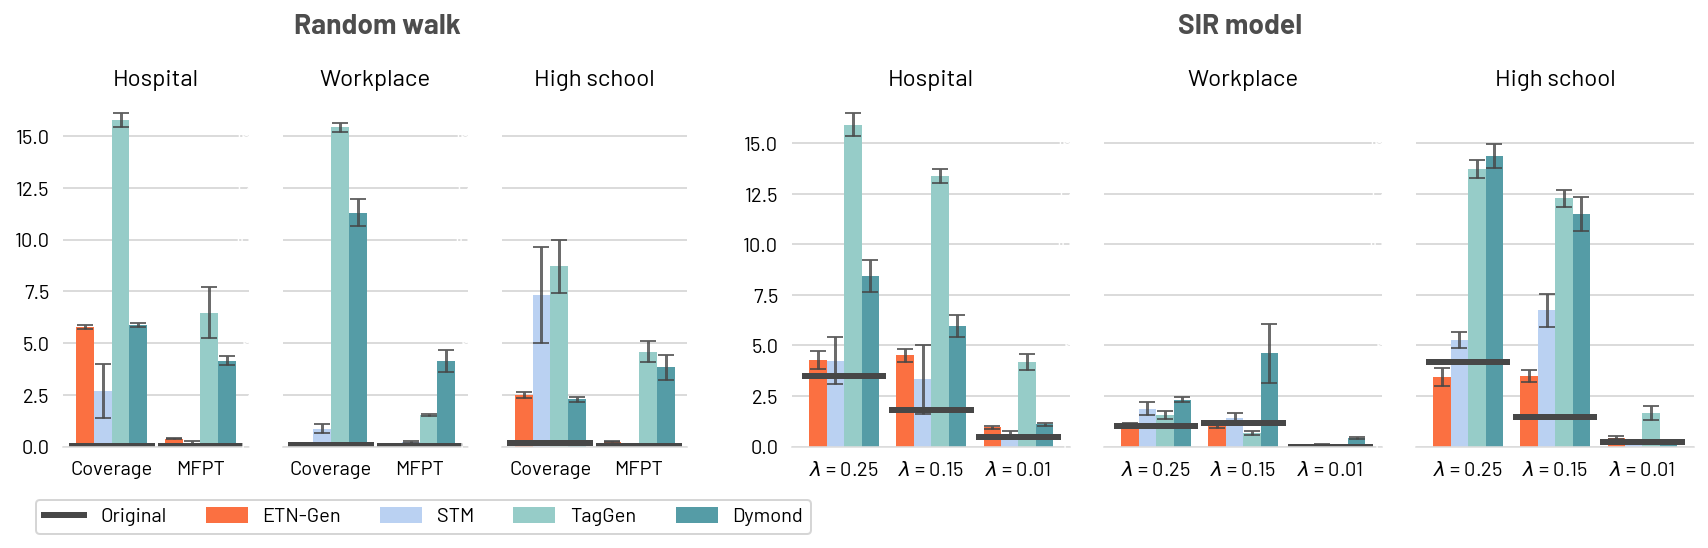

In [258]:
fig, ax = plt.subplots(1,7, figsize=(12,3), gridspec_kw={'width_ratios': [1,1,1,0.2,1.5,1.5,1.5]})
fig.tight_layout(w_pad=-1)

ax[0].get_shared_y_axes().join(ax[0], ax[1],ax[2])
ax[4].get_shared_y_axes().join(ax[4], ax[5],ax[6])
plot_cov_mfpt3(ax[0],"LH10")
plot_cov_mfpt3(ax[1],"InVS13")
plot_cov_mfpt3(ax[2],"High_School11",legend=True)

empty_plot(ax[3])

plot_r03(ax[4],"LH10")
plot_r03(ax[5],"InVS13")
plot_r03(ax[6],"High_School11",legend=True)


ax[1].tick_params(axis='y', colors='white')
ax[2].tick_params(axis='y', colors='white')

#ax[4].tick_params(axis='y', colors='white')
ax[5].tick_params(axis='y', colors='white')
ax[6].tick_params(axis='y', colors='white')

legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                   Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                   Patch(facecolor=STM_COLOR, edgecolor=STM_COLOR,label='STM'),
                   Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen'),
                   Patch(facecolor=DYM_COLOR, edgecolor=DYM_COLOR,label='Dymond')]

# Create the figure
ax[0].legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-0.2, -0.2),ncol=5)

fig.text(0.17, 1.08, 'Random walk',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")
fig.text(0.682, 1.08, 'SIR model',fontdict={'size':14,'color':'#4d4d4d'},weight="bold")


fig.savefig("dynamic_main_test_kld_TEST2_with_stderror.pdf", bbox_inches = 'tight')

In [68]:
def one_line_plot(ax,ori,stab,etn,stm,tag,dym):
    #ax[0].figure(figsize=(15,3))
    #ax[0].supset_title(set_title)
    ax[0].hist(ori)
    ax[0].set_title("orig")
    
    ax[1].hist(stab)
    ax[1].set_title("stab")
    
    ax[2].hist(etn[0][0])
    ax[2].set_title("etn")
    
    ax[3].hist(stm[0][0])
    ax[3].set_title("stm")
    
    ax[4].hist(tag[0][0])
    ax[4].set_title("tag")
    
    ax[5].hist(dym[0][0])
    ax[5].set_title("dym")

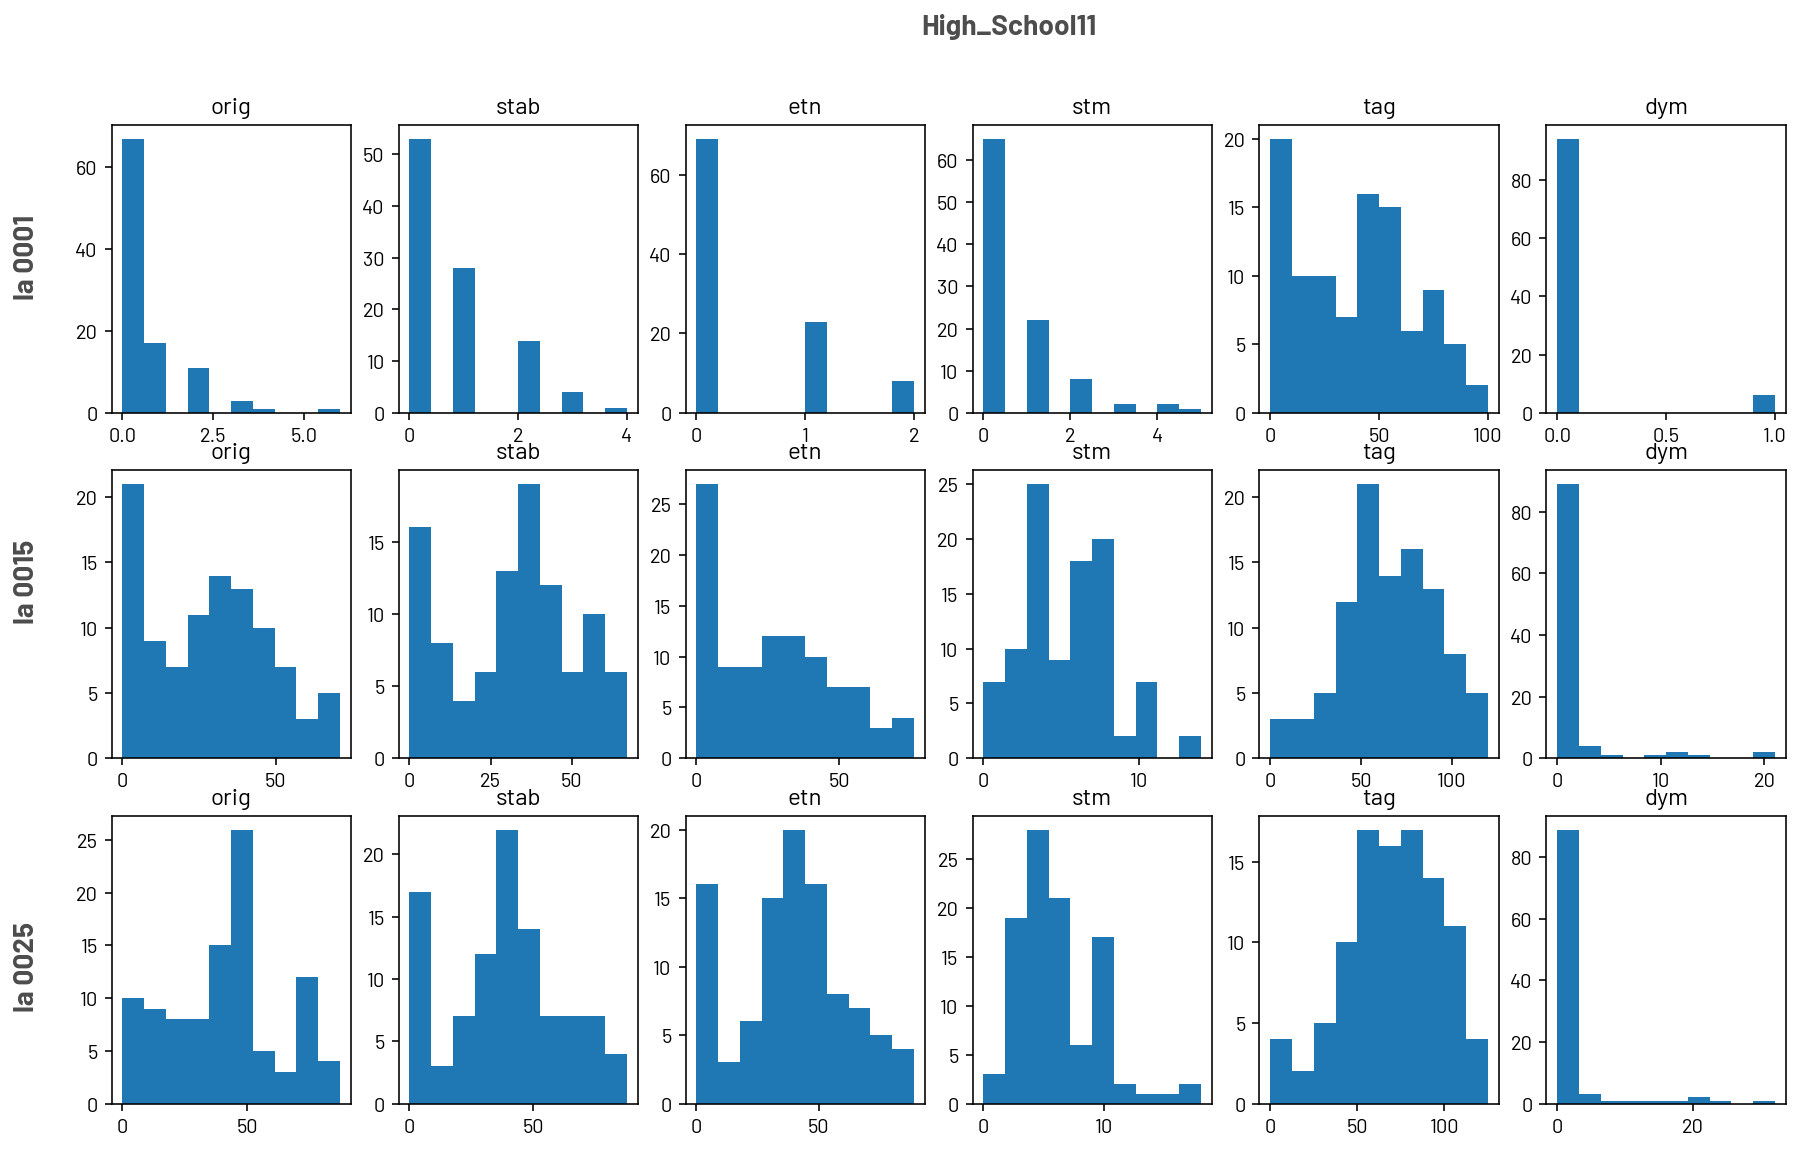

In [69]:
filename = "High_School11"
fig, ax = plt.subplots(3,6, figsize=(15,9))

fig.text(0.5, 0.95, filename,fontdict={'size':14,'color':'#4d4d4d'},weight="bold")
fig.text(0.08, 0.2, 'la 0025',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation="vertical")
fig.text(0.08, 0.5, 'la 0015',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation="vertical")
fig.text(0.08, 0.75, 'la 0001',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation="vertical")

ori,stab,etn,stm,tag,dym = load_r0(filename,lambds=["la001"])
one_line_plot(ax[0],ori,stab,etn,stm,tag,dym)
ori,stab,etn,stm,tag,dym = load_r0(filename,lambds=["la015"])
one_line_plot(ax[1],ori,stab,etn,stm,tag,dym)
ori,stab,etn,stm,tag,dym = load_r0(filename,lambds=["la025"])
one_line_plot(ax[2],ori,stab,etn,stm,tag,dym)

fig.savefig("plot_distributions/dinamic_r0_"+filename+".pdf", bbox_inches = 'tight')

In [76]:
def one_line_plot(ax,ori,stab,etn,stm,tag,dym):
    #ax[0].figure(figsize=(15,3))
    #ax[0].supset_title(set_title)
    ax[0].hist(ori)
    ax[0].set_title("orig")
    
    ax[1].hist(stab)
    ax[1].set_title("stab")
    
    ax[2].hist(etn[0][0])
    ax[2].set_title("etn")
    
    ax[3].hist(stm[0][0])
    ax[3].set_title("stm")
    
    ax[4].hist(tag[0][0])
    ax[4].set_title("tag")
    
    ax[5].hist(dym[0][0])
    ax[5].set_title("dym")

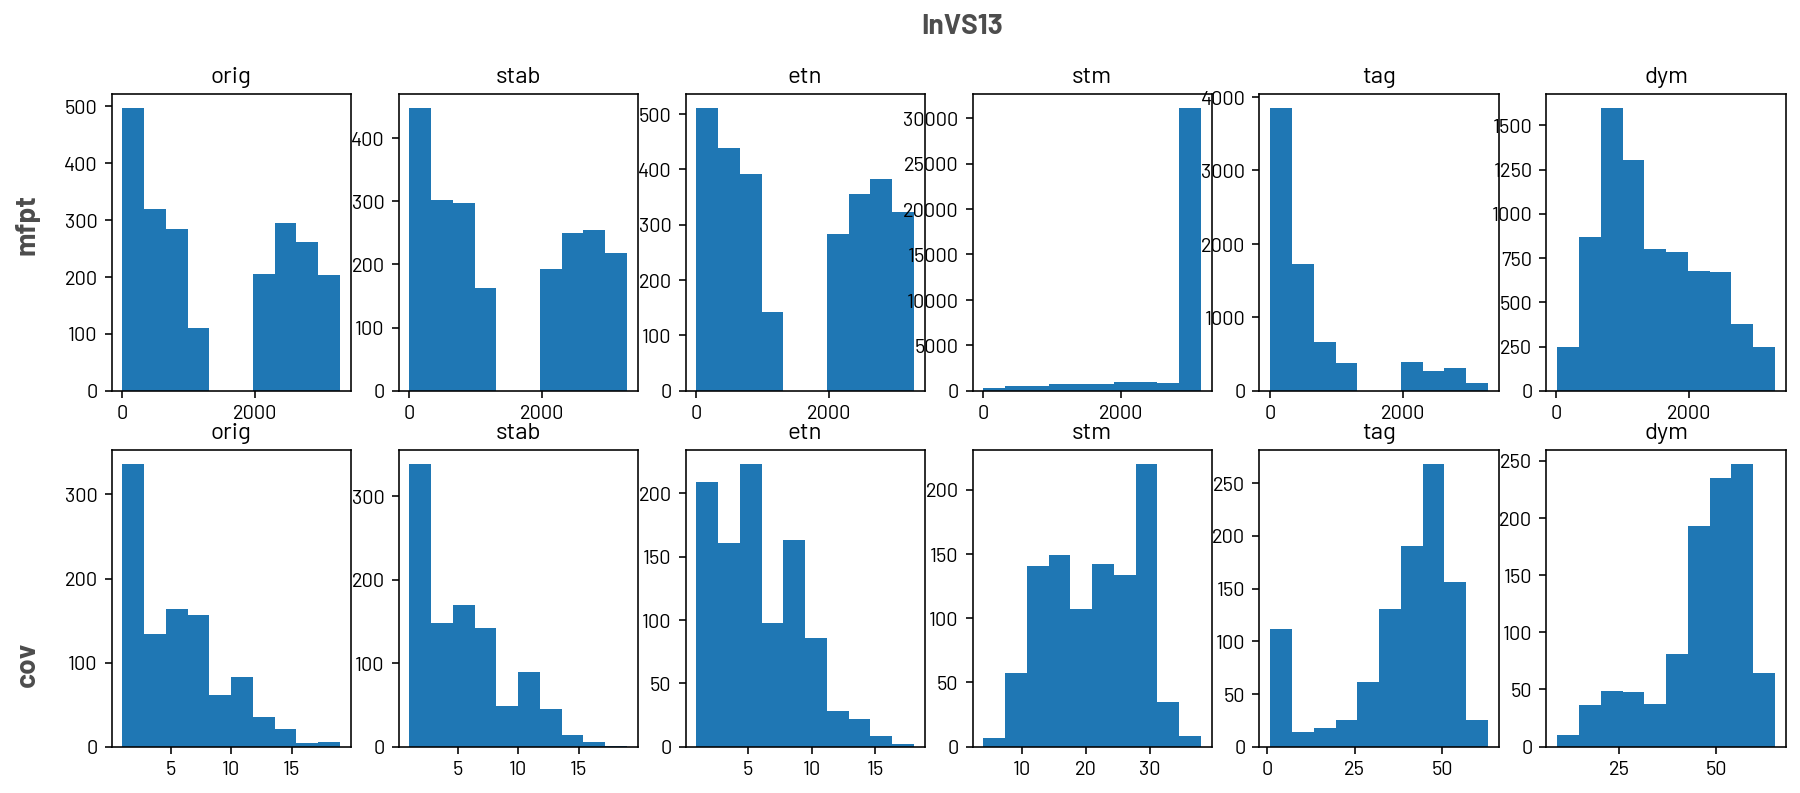

In [85]:
filename = "InVS13"
fig, ax = plt.subplots(2,6, figsize=(15,6))

fig.text(0.5, 0.95, filename,fontdict={'size':14,'color':'#4d4d4d'},weight="bold")
fig.text(0.08, 0.2, 'cov',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation="vertical")
fig.text(0.08, 0.7, 'mfpt',fontdict={'size':14,'color':'#4d4d4d'},weight="bold",rotation="vertical")

ori,stab,etn,stm,tag,dym = load_mfpt(filename)
one_line_plot2(ax[0],ori,stab,etn,stm,tag,dym)

ori,stab,etn,stm,tag,dym = load_cov(filename)
one_line_plot2(ax[1],ori,stab,etn,stm,tag,dym)

fig.savefig("plot_distributions/dinamic_random_walk_"+filename+".pdf", bbox_inches = 'tight')